In [2]:
!pip install ucimlrepo

In [3]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import Iris Data
---
This is a multiclassification

In [4]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [5]:
X.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the data
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#X.head(10)

In [7]:
data

NameError: name 'data' is not defined

In [8]:
y=y.copy()
y['class'] = y['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y

/tmp/ipython-input-3080180951.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Exploratory Data Analysis
----

In [9]:
eda = X.copy()
eda["species"] = y
eda.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
corr = eda.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [11]:
# convert to a pytorch tensor
data = torch.tensor(X.values).float()
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [21]:
labels = torch.tensor(y.values)
labels = labels.view(1,-1)
labels

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]])

# Functions to create and train the model

In [22]:
# Note the input into the function!
def createModel(nHidden):

    # model architecture (with number of units soft-coded!)
    ANN = nn.Sequential(
      nn.Linear(4,nHidden),      # input layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,nHidden),# 1st hidden layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,3),      # output unit
        )

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(ANN.parameters(),lr=.01)

    return ANN,lossfunc,optim

In [23]:
# a function to train the model

def train(ANN):

    # initialize losses
    losses = torch.zeros(epochs)
    acc = []

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANN(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANN(data)

    predlabels = torch.argmax(predictions,axis=1)
    return 100*torch.mean((predlabels==labels).float())

# Perform the experiment

In [26]:
epochs  = 150
hiddens = np.arange(1,129)
accuracies = []

for units in hiddens:

    # create a fresh model instance
    ANN,lossfunc,optimizer = createModel(units)

    # run the model
    acc = train(ANN)
    accuracies.append(acc)


ValueError: Expected input batch_size (150) to match target batch_size (1).

In [ ]:
# Report accuracy
fig, ax = plt.subplots(1, figsize=(12, 6))

# Plot each point with conditional coloring
for i in range(len(accuracies)):
    if accuracies[i] < 70:
        color = 'red'
    elif 70 <= accuracies[i] <= 90:
        color = 'orange'
    else:
        color = 'green'

    ax.plot(numhiddens[i], accuracies[i], 'o-', color='blue', markerfacecolor=color, markersize=9)

# Add reference lines
ax.plot(numhiddens[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot(numhiddens[[0, -1]], [70, 70], '--', color=[.8, .8, .8])
ax.plot(numhiddens[[0, -1]], [90, 90], '--', color=[.8, .8, .8])

# Set labels and title
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')

# Show plot
plt.show()

# Experiments

1. Try changing the data type of the label from integer to float, and compare the result with the original.
2. Perform an experiment that will relate the varying values of learning rate and number of hidden units, and epoch. Create a bubble chart with the x-axis as the number of units, the y-axis as the learning rate, the size as the number of epochs, and the color as the accuracy.

#Experiment 1

In [48]:
# ==============================
# IMPORT LIBRARIES
# ==============================
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


# ==============================
# FETCH DATASET (IRIS)
# ==============================
iris = fetch_ucirepo(id=53)  # Iris dataset
X = iris.data.features
y = iris.data.targets

# Display first few rows
print(X.head(10))


# ==============================
# PREPROCESSING
# ==============================
# Scale data between 0 and 1
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode target labels numerically
y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Combine for EDA (optional)
eda = X.copy()
eda["species"] = y
print(eda.head())

# Correlation heatmap
corr = eda.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')


# ==============================
# CONVERT TO TORCH TENSORS
# ==============================
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).squeeze() # Make 1D tensor of class indices


# ==============================
# DEFINE MODEL CREATION FUNCTION
# ==============================
def createModel(nHidden):
    """Create a simple feedforward neural network."""
    ANN = nn.Sequential(
        nn.Linear(4, nHidden),     # input layer (4 features)
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),  # hidden layer
        nn.ReLU(),
        nn.Linear(nHidden, 3)      # output layer (3 classes)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=0.01)
    return ANN, lossfunc, optimizer


# ==============================
# TRAINING FUNCTION
# ==============================
def train(ANN, lossfunc, optimizer, epochs=150):
    """Train the model and return accuracy."""
    losses = torch.zeros(epochs)

    for i in range(epochs):
        # forward pass
        pred = ANN(data)

        # compute loss
        loss = lossfunc(pred, labels)
        losses[i] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final predictions
    predictions = ANN(data)
    predlabels = torch.argmax(predictions, axis=1)
    accuracy = 100 * torch.mean((predlabels == labels).float())

    return accuracy


# ==============================
# MODEL EVALUATION
# ==============================
epochs = 150
hiddens = np.arange(1, 129)
accuracies = []

for units in hiddens:
    ANN, lossfunc, optimizer = createModel(units)
    acc = train(ANN, lossfunc, optimizer, epochs)
    accuracies.append(acc)


# ==============================
# PLOT RESULTS
# ==============================
fig, ax = plt.subplots(1, figsize=(12, 6))

for i in range(len(accuracies)):
    if accuracies[i] < 70:
        color = 'red'
    elif 70 <= accuracies[i] <= 90:
        color = 'orange'
    else:
        color = 'green'

    ax.plot(hiddens[i], accuracies[i], 'o-', color='blue',
            markerfacecolor=color, markersize=9)

# Reference lines
ax.plot([hiddens[0], hiddens[-1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot([hiddens[0], hiddens[-1]], [70, 70], '--', color=[.8, .8, .8])
ax.plot([hiddens[0], hiddens[-1]], [90, 90], '--', color=[.8, .8, .8])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('ANN Accuracy vs Number of Hidden Units')
plt.show()


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
   sepal length  sepal width  petal length  petal width  species
0      0.222222     0.625000      0.067797     0.041667        0
1      0.166667     0.416667      0.067797     0.041667        0
2      0.111111     0.500000      0.050847     0.041667        0
3      0.083333     0.458333      0.084746     0.041667        0
4      0.194444     0.666667      0.067797     0.041667    

/tmp/ipython-input-3472532979.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


RuntimeError: expected scalar type Long but found Float

#Experiment 2

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
   sepal length  sepal width  petal length  petal width  species
0      0.222222     0.625000      0.067797     0.041667        0
1      0.166667     0.416667      0.067797     0.041667        0
2      0.111111     0.500000      0.050847     0.041667        0
3      0.083333     0.458333      0.084746     0.041667        0
4      0.194444     0.666667      0.067797     0.041667    

/tmp/ipython-input-702464495.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


Units=4, LR=0.001, Epochs=400 → Accuracy=38.67%
Units=4, LR=0.01, Epochs=50 → Accuracy=33.33%
Units=4, LR=0.01, Epochs=100 → Accuracy=33.33%
Units=4, LR=0.01, Epochs=200 → Accuracy=33.33%
Units=4, LR=0.01, Epochs=400 → Accuracy=33.33%
Units=4, LR=0.05, Epochs=50 → Accuracy=33.33%
Units=4, LR=0.05, Epochs=100 → Accuracy=33.33%
Units=4, LR=0.05, Epochs=200 → Accuracy=66.67%
Units=4, LR=0.05, Epochs=400 → Accuracy=68.67%
Units=4, LR=0.1, Epochs=50 → Accuracy=46.67%
Units=4, LR=0.1, Epochs=100 → Accuracy=66.67%
Units=4, LR=0.1, Epochs=200 → Accuracy=93.33%
Units=4, LR=0.1, Epochs=400 → Accuracy=95.33%
Units=8, LR=0.001, Epochs=50 → Accuracy=33.33%
Units=8, LR=0.001, Epochs=100 → Accuracy=33.33%
Units=8, LR=0.001, Epochs=200 → Accuracy=33.33%
Units=8, LR=0.001, Epochs=400 → Accuracy=33.33%
Units=8, LR=0.01, Epochs=50 → Accuracy=33.33%
Units=8, LR=0.01, Epochs=100 → Accuracy=18.00%
Units=8, LR=0.01, Epochs=200 → Accuracy=33.33%
Units=8, LR=0.01, Epochs=400 → Accuracy=62.67%
Units=8, LR=0.05,

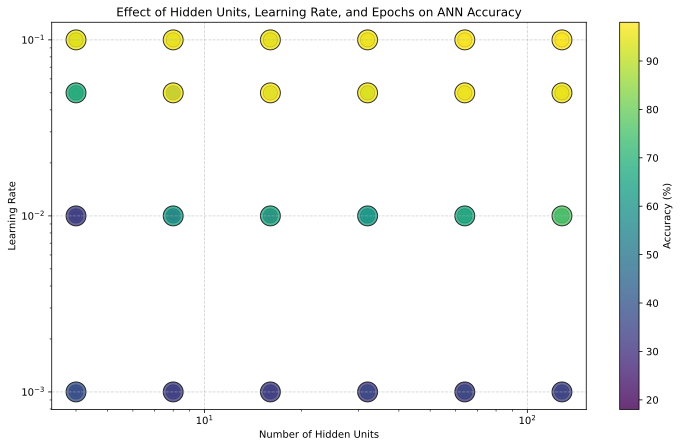

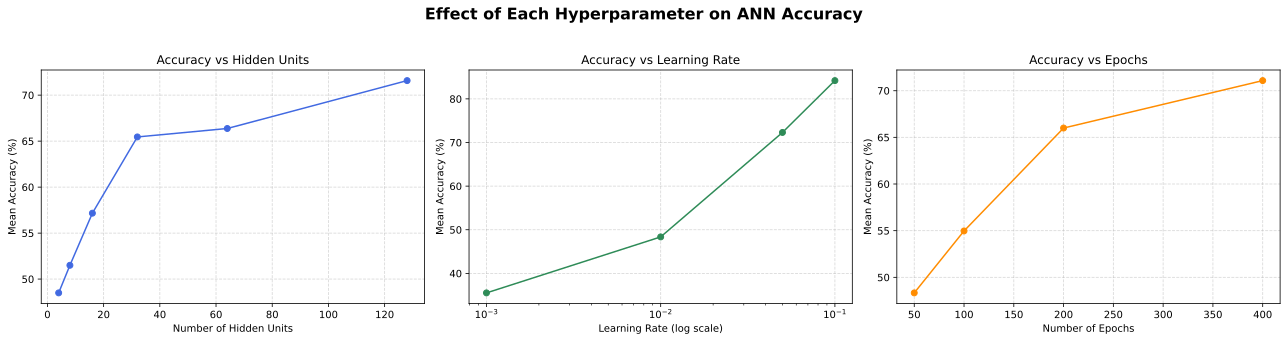

In [50]:
# ==============================
# IMPORT LIBRARIES
# ==============================
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


# ==============================
# FETCH DATASET (IRIS)
# ==============================
iris = fetch_ucirepo(id=53)  # Iris dataset
X = iris.data.features
y = iris.data.targets

# Display first few rows
print(X.head(10))


# ==============================
# PREPROCESSING
# ==============================
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode target labels numerically
y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Combine for EDA (optional)
eda = X.copy()
eda["species"] = y
print(eda.head())

# Correlation heatmap
corr = eda.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')


# ==============================
# CONVERT TO TORCH TENSORS
# ==============================
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).squeeze().long()  # integer class indices


# ==============================
# DEFINE MODEL CREATION FUNCTION
# ==============================
def createModel(nHidden, lr):
    """Create a simple feedforward neural network."""
    ANN = nn.Sequential(
        nn.Linear(4, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, 3)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=lr)
    return ANN, lossfunc, optimizer


# ==============================
# TRAINING FUNCTION
# ==============================
def train(ANN, lossfunc, optimizer, epochs=150):
    """Train the model and return accuracy."""
    for i in range(epochs):
        pred = ANN(data)
        loss = lossfunc(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # final accuracy
    predictions = ANN(data)
    predlabels = torch.argmax(predictions, axis=1)
    accuracy = 100 * torch.mean((predlabels == labels).float())
    return accuracy.item()


# ==============================
# EXPERIMENT SETUP
# ==============================
hidden_units = [4, 8, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.05, 0.1]
epoch_counts = [50, 100, 200, 400]

results = []

# Loop through all combinations
for h in hidden_units:
    for lr in learning_rates:
        for ep in epoch_counts:
            ANN, lossfunc, optimizer = createModel(h, lr)
            acc = train(ANN, lossfunc, optimizer, ep)
            results.append([h, lr, ep, acc])
            print(f"Units={h}, LR={lr}, Epochs={ep} → Accuracy={acc:.2f}%")

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["HiddenUnits", "LearningRate", "Epochs", "Accuracy"])


# ==============================
# PLOT RESULTS (BUBBLE CHART)
# ==============================
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    results_df["HiddenUnits"],
    results_df["LearningRate"],
    s=results_df["Epochs"],  # bubble size
    c=results_df["Accuracy"],  # color = accuracy
    cmap="viridis",
    alpha=0.8,
    edgecolors="k"
)

plt.xscale("log")  # optional: makes unit scaling clearer
plt.yscale("log")
plt.colorbar(scatter, label="Accuracy (%)")
plt.title("Effect of Hidden Units, Learning Rate, and Epochs on ANN Accuracy")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Learning Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ==============================
# ADDITIONAL VISUALIZATION — ONE GRAPH PER FACTOR
# ==============================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Effect of Each Hyperparameter on ANN Accuracy", fontsize=16, fontweight='bold')

# 1️⃣ Accuracy vs. Number of Hidden Units
avg_units = results_df.groupby("HiddenUnits")["Accuracy"].mean().reset_index()
axes[0].plot(avg_units["HiddenUnits"], avg_units["Accuracy"], 'o-', color='royalblue')
axes[0].set_xlabel("Number of Hidden Units")
axes[0].set_ylabel("Mean Accuracy (%)")
axes[0].set_title("Accuracy vs Hidden Units")
axes[0].grid(True, linestyle="--", alpha=0.5)

# 2️⃣ Accuracy vs. Learning Rate
avg_lr = results_df.groupby("LearningRate")["Accuracy"].mean().reset_index()
axes[1].plot(avg_lr["LearningRate"], avg_lr["Accuracy"], 'o-', color='seagreen')
axes[1].set_xscale('log')
axes[1].set_xlabel("Learning Rate (log scale)")
axes[1].set_ylabel("Mean Accuracy (%)")
axes[1].set_title("Accuracy vs Learning Rate")
axes[1].grid(True, linestyle="--", alpha=0.5)

# 3️⃣ Accuracy vs. Epochs
avg_epochs = results_df.groupby("Epochs")["Accuracy"].mean().reset_index()
axes[2].plot(avg_epochs["Epochs"], avg_epochs["Accuracy"], 'o-', color='darkorange')
axes[2].set_xlabel("Number of Epochs")
axes[2].set_ylabel("Mean Accuracy (%)")
axes[2].set_title("Accuracy vs Epochs")
axes[2].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

